<a href="https://colab.research.google.com/github/deanhadzi/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

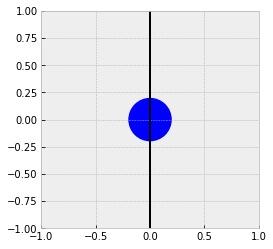

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('bmh')

# Circle will fail the vertical line test.

cir = plt.Circle((0, 0), 0.2)
fig, ax = plt.subplots()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
ax.add_artist(cir)
ax.vlines(0, -1, 1)
ax.set_aspect('equal')
plt.show()

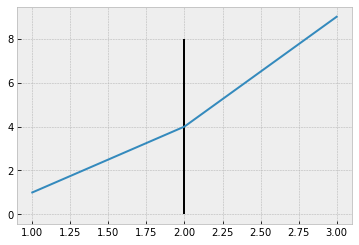

In [2]:
# Simple quadratic function 

x = np.array([1, 2, 3])
y = x**2
fig, ax = plt.subplots()
ax.vlines(2, 0, 8)
plt.plot(x, y)
plt.show()


## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

If the vertical line intercepts the graph line more than once, it means that we have 2 y values for one x value. This fails basic definition of function which says that for each x there can be only one output y. 

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}\text { Not a function. X=1 yields 2 different Y values.}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}\text { Function. Each X yields different Y value.}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}\text { Not a function. X=9 yields 2 different Y values.}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}\text { Not a function. X=6 yields 2 different Y values.}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}\text { Not a function. X=2 yields 3 different Y values.}
\end{align}


# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}



* m function is three dimensional for both domain and codomain.
* n function has four dimensional domain and two dimensional codomain.



## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

* It's not possible.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}




\begin{align}
\text{Transofrmation matrix P } = \begin{bmatrix} 1 & 3 \\-1 & 2 \end{bmatrix}
\\
\\
\text{Transofrmation matrix Q } = \begin{bmatrix} 4 & 1 & 2 \\-1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
\end{align}


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.



Eigenvectors have identical span before and after the Linear Transformation. Eigenvalues represent the scalar by which the Eigenvector before the transformation are multiplied to arrive to their position after the transformation. 

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Challenges of working with high dimensional spaces lie in the fact that increasing the dimensionality of the space makes it harder for us to locate the data as it becomes more sparse in larger spaces. 

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

There should be always more observations than features. We should aim at no less than five times the observations as the number of features (more is of course better). Finally more data in terms of additional dimesnions have diminishing values. 

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['species']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [5]:
pd.DataFrame(data = x, columns = features).head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['PC 1', 'PC 2'])

In [7]:
principalDf.head()

,PC 1,PC 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [8]:
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)
finalDf.head()

,PC 1,PC 2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


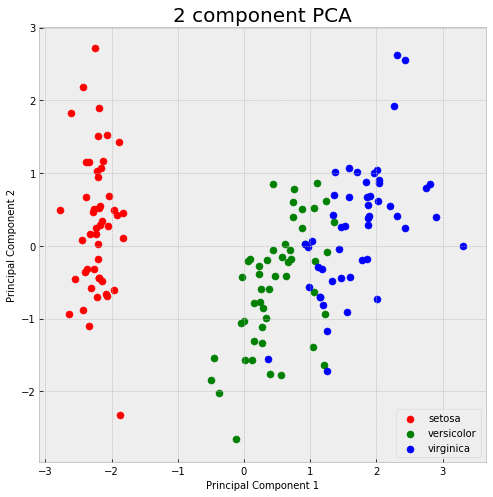

In [11]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1'], 
               finalDf.loc[indicesToKeep, 'PC 2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid(True)

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)